# 1. Cargamos las librerías y la base de datos

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Cargar dataset MNIST / Fashion Mnist

dataset_name = 'Fashion-MNIST'

if dataset_name == 'MNIST':
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    print('Dataset MNIST fue cargado!')
elif dataset_name == 'Fashion-MNIST':
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    print('Dataset Fashion-MNIST fue cargado!')
else:
    print('Dataset incorrecto!')

4431872/4422102 [==============================] - 0s 0us/step
Dataset Fashion-MNIST fue cargado!


# 2. EDA

In [ ]:
# Explorar los datos
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

print(train_images[200,:15,:15])
print(class_names[train_labels[200]])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0  82 122]
 [  0   0   0   0   0   0   0   0   0   0   2   0  38 100  28]
 [  0   0   0   0   0   0   0   0   0   0   5   0  86  43   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0 104  30   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0 111   2   0]
 [  0   0   0   0   0   0   0   0   0   2   0  17  87   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0  54  90   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0  76  30   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0  74   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 109   0   0   1]
 [  0   0   0   0   0   0   0   0   2   0  31  79   0   2   2]
 [  0   0   0   0   0   0   0   0   5   0  66  90   0   1   1]
 [  0   0   0   0   0   0   0   0   5   0  82 136   0   3   4]
 [  0   0   0   0   0   0   0   0   0   0  95 166   0   0   0]
 [  0   0   0   0   0   0   0   0   0  45 145 191  20  65  68]]
Bag


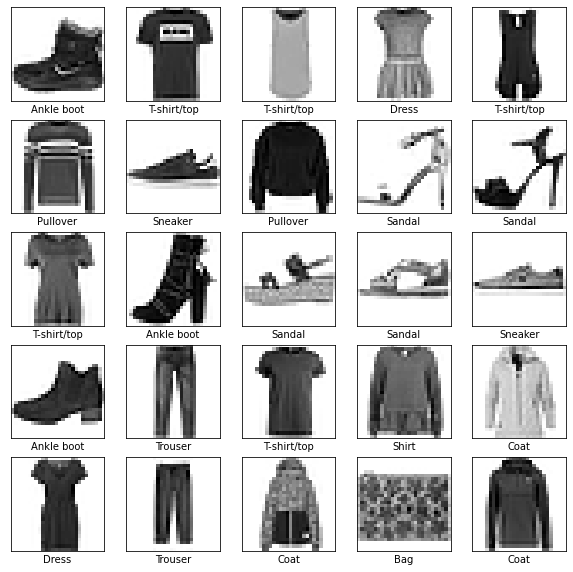

In [ ]:
# Explorar las imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

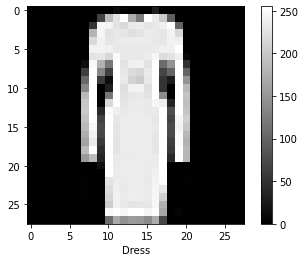

In [ ]:
# Explorar solo una imagen

example_id = 2500

plt.figure()
plt.imshow(train_images[example_id], cmap='gray')
plt.xlabel(class_names[train_labels[example_id]])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalizar y remodelar las dimensiones de la data.
train_images = train_images / 255.0
test_images = test_images / 255.0

print('Antes:')
print('train_images:', train_images.shape, '- train_labels:', train_labels.shape, '  |  test_images:', test_images.shape , '- test_labels:', test_labels.shape,)

# Cambiar las dimensiones de las imagenes para entrenar.
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

image_shape = train_images.shape[1:]
n_classes = len(np.unique(train_labels))

# One-Hot Encoding
train_labels = to_categorical(train_labels, n_classes)
test_labels = to_categorical(test_labels, n_classes)


print('\nDespués:')
print('train_images:', train_images.shape, '- train_labels:', train_labels.shape, '  |  test_images:', test_images.shape , '- test_labels:', test_labels.shape,)

# tamaño de las imagenes y numéro de clases:
print('\nTamaño de las imagenes:', image_shape)
print('Numero de clases:', n_classes)

Antes:
train_images: (60000, 28, 28) - train_labels: (60000,)   |  test_images: (10000, 28, 28) - test_labels: (10000,)

Después:
train_images: (60000, 28, 28, 1) - train_labels: (60000, 10)   |  test_images: (10000, 28, 28, 1) - test_labels: (10000, 10)

Tamaño de las imagenes: (28, 28, 1)
Numero de clases: 10


# 3. Planteamiento de modelo

In [ ]:
# Definir el model:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# apagado aleatorio de neuronas
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

# 4. Entrenamiento del modelo | Compilación de la red neuronal

In [ ]:
# Número de imagenes procesadas a la vez en cada iteracion. 
batch_size = 128    
# Número de iteraciones.
epochs = 25
# Adam o SGD
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit 
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

Epoch 1/25
422/422 - 13s - loss: 0.6973 - accuracy: 0.7497 - val_loss: 0.4406 - val_accuracy: 0.8433 - 13s/epoch - 30ms/step
Epoch 2/25
422/422 - 2s - loss: 0.4466 - accuracy: 0.8401 - val_loss: 0.3824 - val_accuracy: 0.8623 - 2s/epoch - 4ms/step
Epoch 3/25
422/422 - 2s - loss: 0.3965 - accuracy: 0.8583 - val_loss: 0.3506 - val_accuracy: 0.8727 - 2s/epoch - 4ms/step
Epoch 4/25
422/422 - 2s - loss: 0.3690 - accuracy: 0.8666 - val_loss: 0.3206 - val_accuracy: 0.8842 - 2s/epoch - 4ms/step
Epoch 5/25
422/422 - 2s - loss: 0.3466 - accuracy: 0.8751 - val_loss: 0.3084 - val_accuracy: 0.8867 - 2s/epoch - 4ms/step
Epoch 6/25
422/422 - 2s - loss: 0.3338 - accuracy: 0.8793 - val_loss: 0.3073 - val_accuracy: 0.8897 - 2s/epoch - 5ms/step
Epoch 7/25
422/422 - 2s - loss: 0.3200 - accuracy: 0.8841 - val_loss: 0.2850 - val_accuracy: 0.8973 - 2s/epoch - 4ms/step
Epoch 8/25
422/422 - 2s - loss: 0.3088 - accuracy: 0.8882 - val_loss: 0.2861 - val_accuracy: 0.8973 - 2s/epoch - 4ms/step
Epoch 9/25
422/422 - 

# 5. Métricas

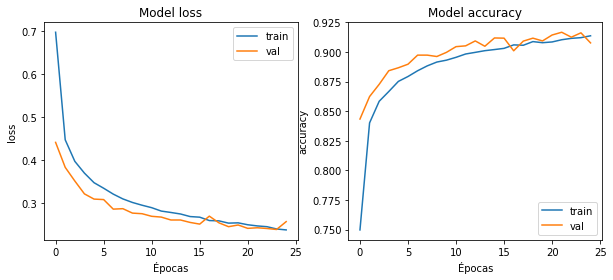

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.ravel()

for i, met in enumerate(["loss", "accuracy"]):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("Épocas")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

# 6. Predicciones

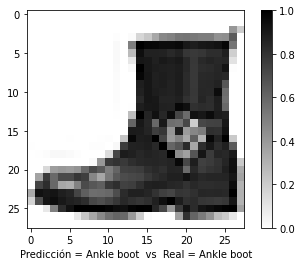

In [ ]:
random_id = np.random.randint(test_images.shape[0], size=1)[0]

image = test_images[random_id]
image_class = np.argmax(test_labels[random_id])

yhat = model.predict(np.asarray([image]))
predicted_class = np.argmax(yhat)

plt.figure()
plt.imshow(np.squeeze(image), cmap=plt.cm.binary)
plt.xlabel("Predicción = {:s}  vs  Real = {:s}".format(class_names[predicted_class], class_names[image_class]))
plt.colorbar()
plt.grid(False)
plt.show()

# 7. Evaluación del modelo 

In [ ]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('Accuracy: %.3f' % acc)

313/313 - 1s - loss: 0.2698 - accuracy: 0.9004 - 1s/epoch - 4ms/step
Accuracy: 0.900


# 8. Guardado del modelo

In [ ]:
model.save('fashion.h5')